# CAB INVESTMENT ANALYSIS BY CHUKWUJEKWU JOSEPH EZEMA -18/10/22

# 1.0 Load Datasets

In [1]:
# 1.1 Import and Install Libraries
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

#date libraries
from datetime import datetime

# display all columns of the dataset
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

#Confirmation
print('Libraries successfully installed')

Libraries successfully installed


In [4]:
""" Step 1: Get dataset """
# 1.2 Load datasets

# Reading the Cab Data File - dataset for the features
cab = pd.read_csv('Cab_Data.csv')

cab_copy = cab.copy() #making a copy
cab_copy

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [5]:
# Reading the City File 
city = pd.read_csv('City.csv')

city_copy = city.copy() #making a copy
city_copy

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [4]:
# Reading the Customer File
customer = pd.read_csv('Customer_ID.csv')

customer_copy = customer.copy() #making a copy
customer_copy

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [5]:
# Reading the Transaction File 
transaction = pd.read_csv('Transaction_ID.csv')

transaction_copy = transaction.copy() #making a copy
transaction_copy

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [6]:
# merge city dataset to the cab data
cab_data = cab.merge(city, on="City", how='left')

In [7]:
# merge customer dataset to transaction
tranx_data = transaction.merge(customer, on="Customer ID", how='left')

In [8]:
#creating a master's data from the given datasets using inner join to remove unwanted rows
data = tranx_data.merge(cab_data, on="Transaction ID", how='inner')
data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
2,10000013,28712,Cash,Male,53,11242,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701"
3,10000014,28020,Cash,Male,23,23327,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701"
4,10000015,27182,Card,Male,33,8536,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,Male,24,15651,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001"
359388,10440104,53286,Cash,Male,32,6528,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001"
359389,10440105,52265,Cash,Male,56,7966,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001"
359390,10440106,52175,Card,Male,32,6423,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001"


# 2.0 Exploratory Data Analysis

In [9]:
""" Step 2: Explore the master's data """
#2.1 exploring the nature of the master's data
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Gender              359392 non-null  object 
 4   Age                 359392 non-null  int64  
 5   Income (USD/Month)  359392 non-null  int64  
 6   Date of Travel      359392 non-null  int64  
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


##### Note that Population and Users are in object type which doesn't translate to the true datatypes (numeric). In the transformation, we will convert them to numerical datatypes. The same will be applied to date column im that regard.

In [10]:
# 2.2 Check features with missing value

data.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
dtype: int64

In [11]:
# 2.3 Check unique ID:

print("Number of unique IDs: {}".format(len(data['Transaction ID'].unique())))


Number of unique IDs: 359392


In [12]:
# 2.4 Check duplicated IDs:

print("Number of duplicated records before dropping:",data['Transaction ID'].duplicated().sum())

Number of duplicated records before dropping: 0


Total number of trips: 359392
Number of Yellow Cab = 274681
Number of Pink Cab = 84711
Percent of Yellow Cab = 76.43%
Percent of Pink Cab = 23.57%


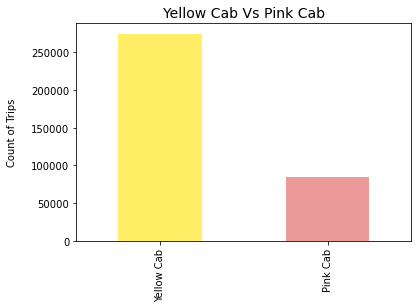

In [13]:
# 2.5 Summary Distribution by Companies
print("Total number of trips:", data.shape[0])
print(f'Number of Yellow Cab = {data["Company"].value_counts()["Yellow Cab"]}')
print(f'Number of Pink Cab = {data["Company"].value_counts()["Pink Cab"]}')
print(f'Percent of Yellow Cab = {round(data["Company"].value_counts()["Yellow Cab"]/len(data) * 100,2)}%')
print(f'Percent of Pink Cab = {round(data["Company"].value_counts()["Pink Cab"]/len(data) * 100,2)}%')

company = data['Company'].value_counts()
colors = np.where(company.index.isin(data.loc[data['Company'] == 'Yellow Cab', 'Company'].unique()), '#FFED66', '#EC9B9A') #conditional formatting
company.plot(kind='bar',color=colors)
plt.title('Yellow Cab Vs Pink Cab', fontsize=14)
plt.ylabel("Count of Trips", labelpad=14)
plt.show()

In [14]:
# 2.6 Numerical distribution
num_col = data.select_dtypes(include=np.number)
num_col.drop(columns=['Transaction ID','Customer ID'],inplace=True) #removing unwanted columns
num_col.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,359392.0,35.336705,12.594234,18.0,25.0000,33.00,42.0000,65.00
Income (USD/Month),359392.0,15048.822937,7969.409482,2000.0,8424.0000,14685.00,21035.0000,35000.00
KM Travelled,359392.0,22.567254,12.233526,1.9,12.0000,22.44,32.9600,48.00
Price Charged,359392.0,423.443311,274.378911,15.6,206.4375,386.36,583.6600,2048.03
Cost of Trip,359392.0,286.190113,157.993661,19.0,151.2000,282.48,413.6832,691.20


<Figure size 1440x1080 with 0 Axes>

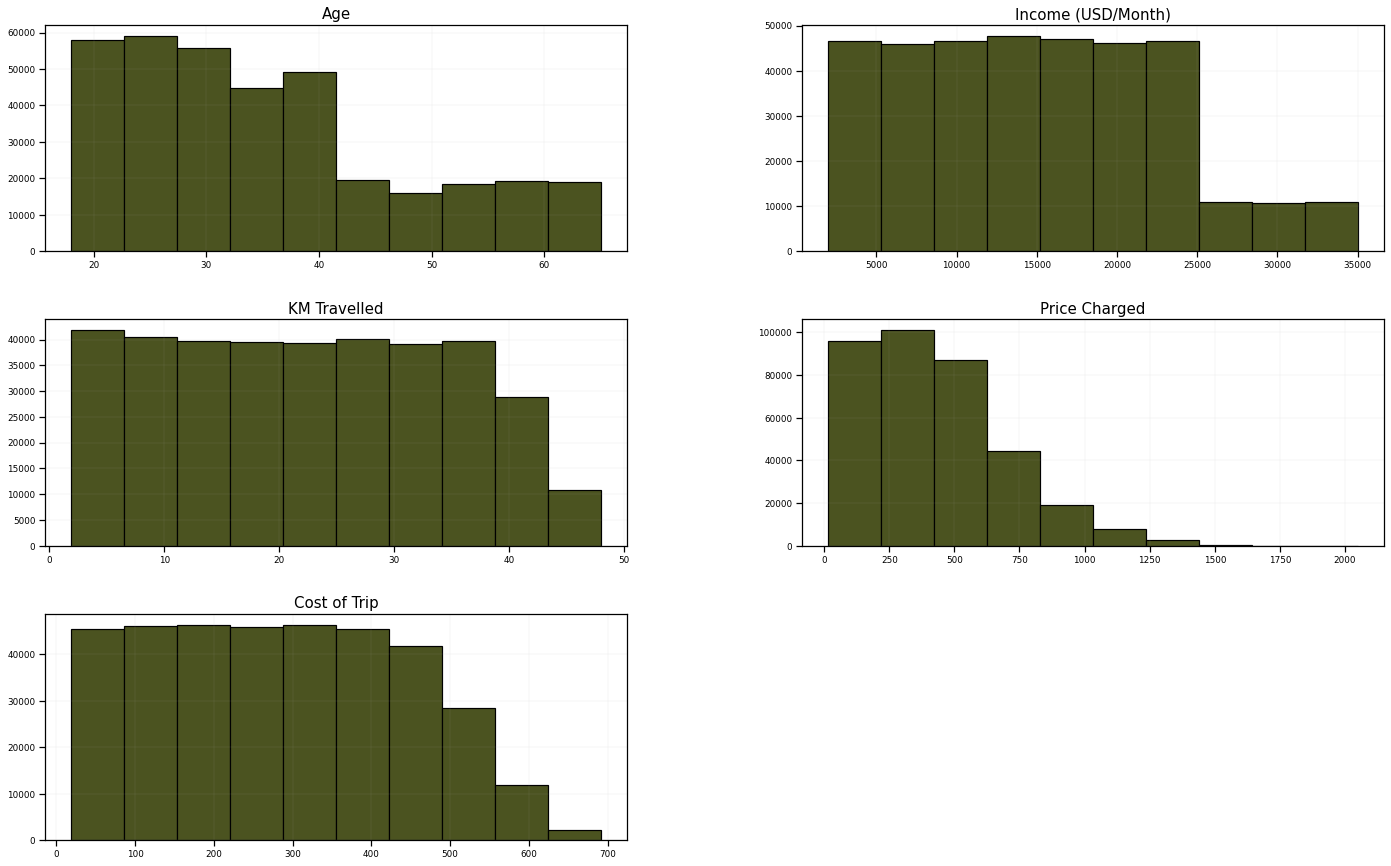

In [15]:
#Customizing the seaborn chart designs
sns.set_context("notebook",font_scale=.8,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 15,                                       
    "figure.autolayout":True})
                
color = '#4b5320' #army green color
palette2 = 'pastel'
palette3 = 'inferno'
palette4 = 'Set2'

# 2.7 Plot the numerical distribution
plt.figure(figsize=(20,15))

num_col.hist(edgecolor='black', linewidth=1.2, color=color)
fig=plt.gcf()
fig.set_size_inches(24,15)

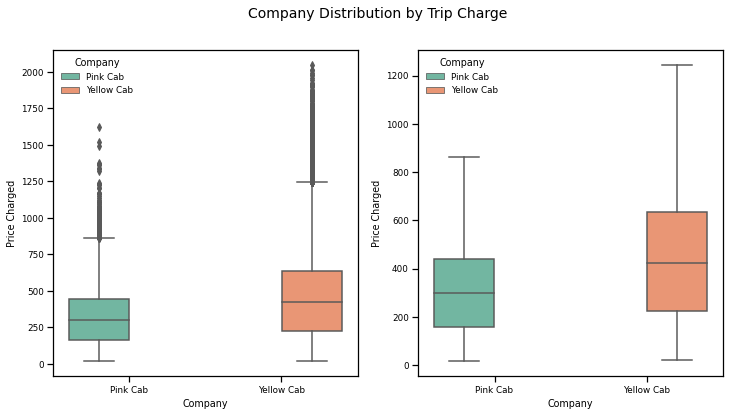

In [16]:
# 2.8 visualize to expose the outliers in respect to the Companies

#trip  charge
fig, (ax1, ax2,) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(ax = ax1, x="Company", y="Price Charged", hue="Company",data=data, palette=palette4,showfliers=True)
sns.boxplot(ax = ax2, x="Company", y="Price Charged", hue="Company",data=data, palette=palette4,showfliers=False)

plt.suptitle('Company Distribution by Trip Charge', fontsize=14)
plt.show()

##### Notice there are outliers here from the price charged by companies; especially by Pink Cab

In [17]:
""" Step 3: Transform the master's data """
# 3.1 changing datatypes

# 3.1.1 to numeric datatypes
data['Population'] = pd.to_numeric(data['Population'].str.replace(',','')) #removed the comma so it can be recognzed as a number
data['Users'] = pd.to_numeric(data['Users'].str.replace(',','')) #removed the comma so it can be recognzed as a number

# 3.1.2 to datetime datatypes
import xlrd #this library converts excel date number to datetime
data['Date of Travel'] = data['Date of Travel'].apply(lambda x : xlrd.xldate_as_datetime(x, 0))

In [18]:
# 3.2 creating custom columns...

# 3.2.1 Year column
data['Year'] = data['Date of Travel'].apply(lambda t: "FY"+str(t.year))

# 3.2.2 Quarter column
data['Quarter'] = data['Date of Travel'].apply(lambda time: "Q"+str(time.quarter))

# 3.2.3 Month column
data['Month'] = data['Date of Travel'].apply(lambda time: time.month_name())

# 3.2.4 Day column
data['Day'] = data['Date of Travel'].apply(lambda time: time.day_name())

# 3.2.5 Profit column
data["Profit"]=np.round(data["Price Charged"]-data["Cost of Trip"],2)

# 3.2.6 City Usage (percentage of users per city population)
data["City %Usage"]=np.round((data["Users"]/data["Population"])*100,2)

# 3.2.7 Cost per KM column
data["Cost per KM"]=np.round(data["Cost of Trip"]/data["KM Travelled"],2)

# 3.2.8 Fare charge per KM column
data["Charge per KM"]=np.round(data["Price Charged"]/data["KM Travelled"],2)

# 3.2.9 Income status
def income_stats(value):
    if value > data['Income (USD/Month)'].mean():
        return "Above Average"
    else:
        return "Below Average"

data['Income Status']= data['Income (USD/Month)'].map(income_stats)

# 3.2.10 Distance status
def KM_stats(value):
    if value > data['KM Travelled'].mean():
        return "Above Average"
    else:
        return "Below Average"

data['Distance Status']= data['KM Travelled'].map(KM_stats)

In [19]:
# 3.3 dropping unwanted columns
data.drop(columns=["Transaction ID","Customer ID"],inplace=True)

#showing data after transformation
data


,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Quarter,Month,Day,Profit,City %Usage,Cost per KM,Charge per KM,Income Status,Distance Status
0,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,FY2016,Q1,January,Friday,57.32,3.03,10.30,12.18,Below Average,Above Average
1,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,FY2016,Q1,January,Wednesday,23.67,3.03,11.70,12.53,Below Average,Above Average
2,Cash,Male,53,11242,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701,FY2016,Q1,January,Saturday,27.57,3.03,10.80,13.85,Below Average,Below Average
3,Cash,Male,23,23327,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701,FY2016,Q1,January,Thursday,25.80,3.03,10.60,11.38,Above Average,Above Average
4,Card,Male,33,8536,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701,FY2016,Q1,January,Sunday,16.84,3.03,11.20,13.13,Below Average,Below Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,Cash,Male,24,15651,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001,FY2018,Q1,January,Monday,5.88,30.32,13.20,14.42,Above Average,Below Average
359388,Cash,Male,32,6528,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001,FY2018,Q1,January,Thursday,6.90,30.32,12.72,13.54,Below Average,Below Average
359389,Cash,Male,56,7966,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001,FY2018,Q1,January,Friday,87.42,30.32,12.60,15.75,Below Average,Above Average
359390,Card,Male,32,6423,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001,FY2018,Q1,January,Friday,32.14,30.32,12.96,16.61,Below Average,Below Average


# 3.0 Data Visualization Analysis and Reporting

In [20]:
""" Step 4: Data Visualization Analysis """
# 4.1 show final state of data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Payment_Mode        359392 non-null  object        
 1   Gender              359392 non-null  object        
 2   Age                 359392 non-null  int64         
 3   Income (USD/Month)  359392 non-null  int64         
 4   Date of Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   City                359392 non-null  object        
 7   KM Travelled        359392 non-null  float64       
 8   Price Charged       359392 non-null  float64       
 9   Cost of Trip        359392 non-null  float64       
 10  Population          359392 non-null  int64         
 11  Users               359392 non-null  int64         
 12  Year                359392 non-null  object        
 13  Quarter             359392 no

In [21]:
# 4.2 Statistical summary
num_col = data.select_dtypes(include=np.number)
num_col.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,359392.0,3.533670e+01,1.259423e+01,18.00,25.0000,33.00,4.200000e+01,65.00
Income (USD/Month),359392.0,1.504882e+04,7.969409e+03,2000.00,8424.0000,14685.00,2.103500e+04,35000.00
KM Travelled,359392.0,2.256725e+01,1.223353e+01,1.90,12.0000,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,2.743789e+02,15.60,206.4375,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,1.579937e+02,19.00,151.2000,282.48,4.136832e+02,691.20
Population,359392.0,3.132198e+06,3.315194e+06,248968.00,671238.0000,1595037.00,8.405837e+06,8405837.00
Users,359392.0,1.583656e+05,1.008501e+05,3643.00,80021.0000,144132.00,3.021490e+05,302149.00
Profit,359392.0,1.372532e+02,1.603118e+02,-220.06,28.0100,81.96,1.900300e+02,1463.97
City %Usage,359392.0,1.066730e+01,1.063377e+01,0.65,3.5900,7.30,9.040000e+00,32.14
Cost per KM,359392.0,1.268155e+01,1.167944e+00,10.00,12.0000,12.84,1.368000e+01,14.40


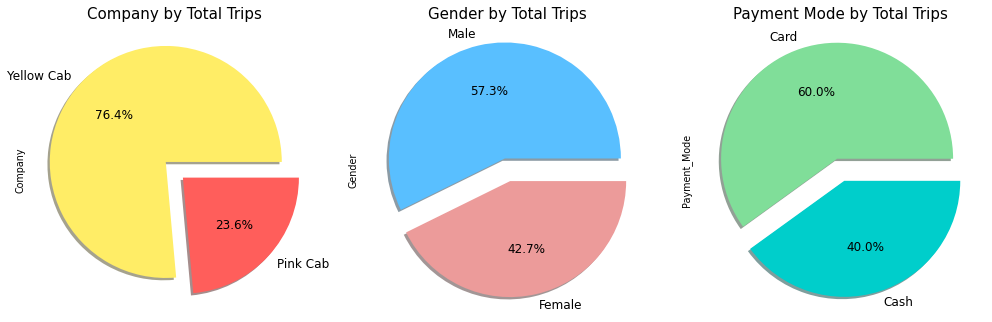

In [22]:
# 4.3 Univariate Analysis

#Distribution of Bi-Categorical Columns
fig, axes = plt.subplots(1,3)

# 4.3.1 company
Company= data['Company'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['#FFED66','#FF5E5B'],textprops = {'fontsize':12}, ax=axes[0])
Company.set_title("Company by Total Trips")

# 4.3.2 gender
Gender= data['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#59BFFF","#EC9B9A"], textprops = {'fontsize':12}, ax=axes[1])
Gender.set_title("Gender by Total Trips")

# 4.3.3 payment mode
Payment_Mode= data['Payment_Mode'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[2])
Payment_Mode.set_title("Payment Mode by Total Trips")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

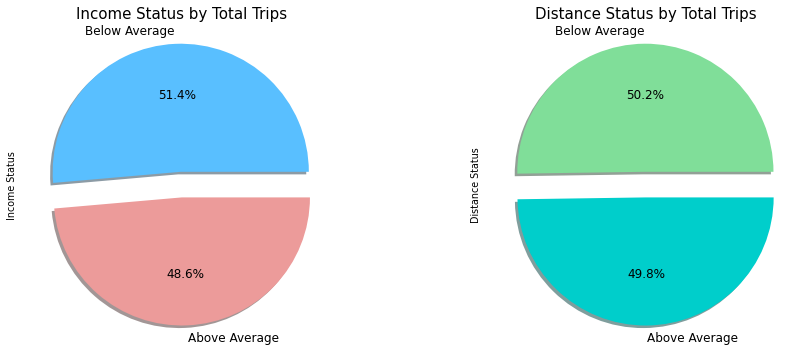

In [23]:
fig, axes = plt.subplots(1,2)

# 4.3.5 income status
Income= data['Income Status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#59BFFF","#EC9B9A"], textprops = {'fontsize':12}, ax=axes[0])
Income.set_title("Income Status by Total Trips")

# 4.3.6 distance status
Distance= data['Distance Status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
Distance.set_title("Distance Status by Total Trips")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

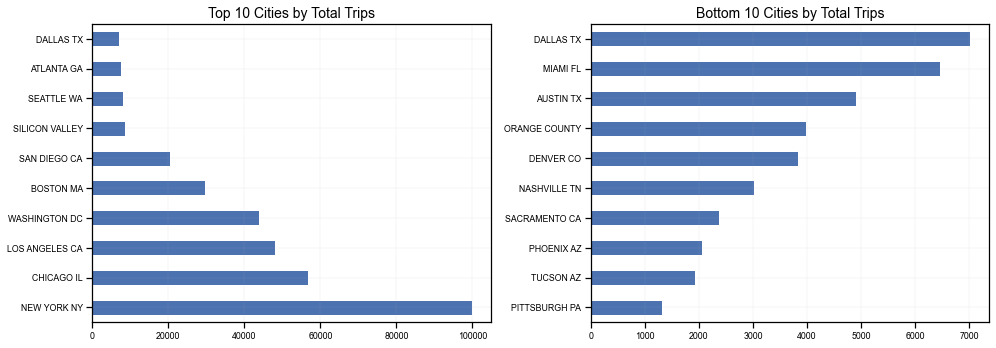

In [24]:
# 4.4 Top 10 most and least hailed cities
fig, axes = plt.subplots(1,2)
sns.set(style="darkgrid")

# 4.4.1 top 10 most hailed cities
TopCity= data["City"].value_counts().nlargest(10).plot(kind='barh',ax=axes[0])
TopCity.set_title("Top 10 Cities by Total Trips", fontsize=14)

# 4.4.2 bottom 10 most hailed cities
TopCity= data["City"].value_counts().nsmallest(10).plot(kind='barh',ax=axes[1])
TopCity.set_title("Bottom 10 Cities by Total Trips", fontsize=14)

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

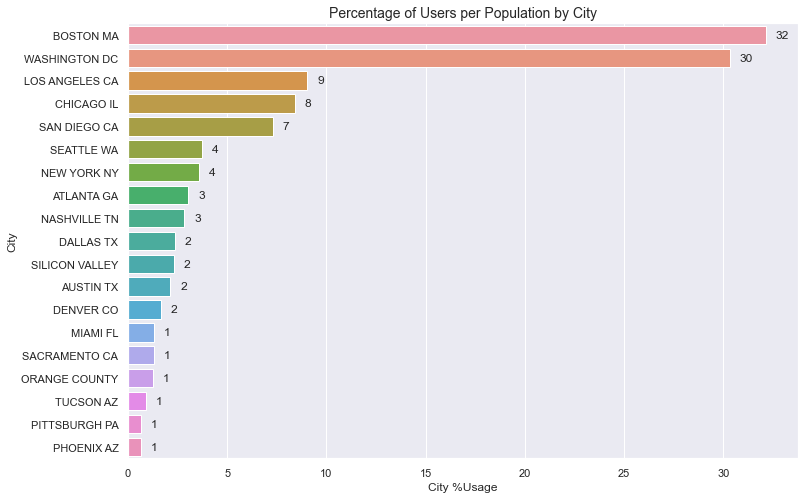

In [25]:
# 4.5 Cities by Company and City Usage
plt.figure(figsize=(12,8))

usage=sns.barplot(y="City", x='City %Usage', data=data.sort_values(by='City %Usage', ascending=False), orient="h", ci=None)
usage.set_title("Percentage of Users per Population by City", fontsize=14)

# label each bar in barplot
for p in usage.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    usage.text(x = width+0.5, # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center

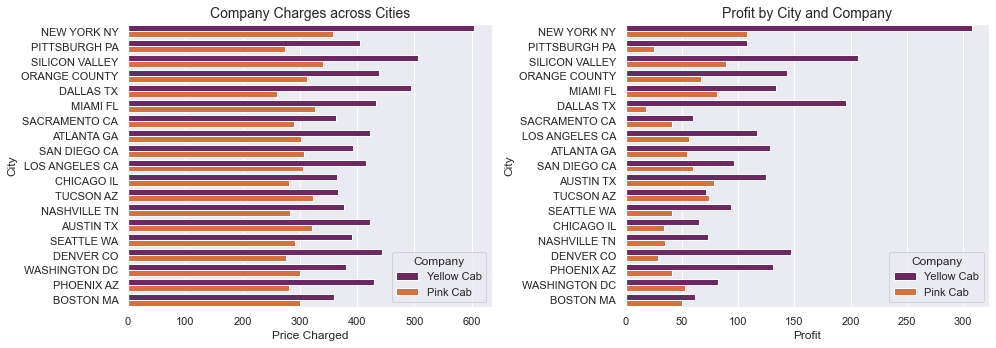

In [26]:
# Cities by Company and Price Charge
fig, axes = plt.subplots(1,2)

# 4.6 Company Charges by City
price=sns.barplot(y="City", x='Price Charged', hue="Company", data=data.sort_values(by='Price Charged', ascending=False), orient="h", ci=None, palette=palette3, ax=axes[0])
price.set_title("Company Charges across Cities", fontsize=14)

# 4.7 Profits by Company across City
profit=sns.barplot(y="City", x='Profit', hue="Company", data=data.sort_values(by='Profit', ascending=False), orient="h", ci=None, palette=palette3, ax=axes[1])
profit.set_title("Profit by City and Company", fontsize=14)

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

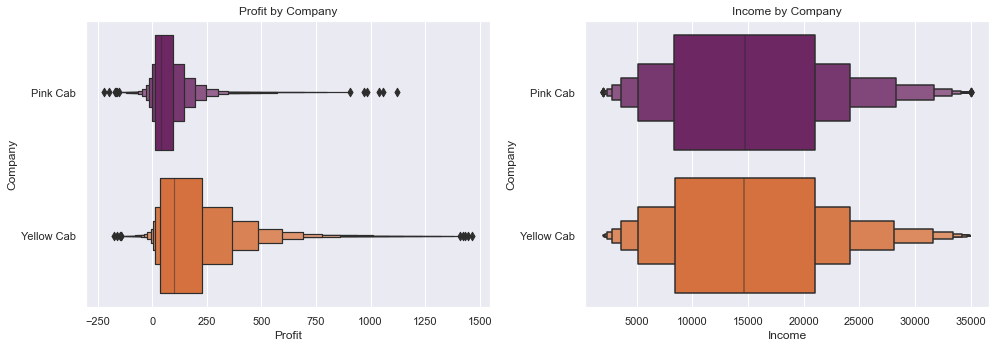

In [27]:
# 4.8 Numerical Distribution across Company => We're investigating how the two companies have performed across different KPIs
fig, axes = plt.subplots(1,2)

# 4.8.1 boxenplot for  Profit vs Company
profit = sns.boxenplot(data['Profit'], data['Company'], palette = palette3, orient='h', linewidth=1.2, ax=axes[0])
profit.set_title('Profit by Company')
profit.set_xlabel('Profit')
profit.set_ylabel('Company')

# 4.8.2 boxenplot for  Income vs Company
income = sns.boxenplot(data['Income (USD/Month)'], data['Company'], palette = palette3, orient='h', ax=axes[1])
income.set_title('Income by Company')
income.set_xlabel('Income')
income.set_ylabel('Company')

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

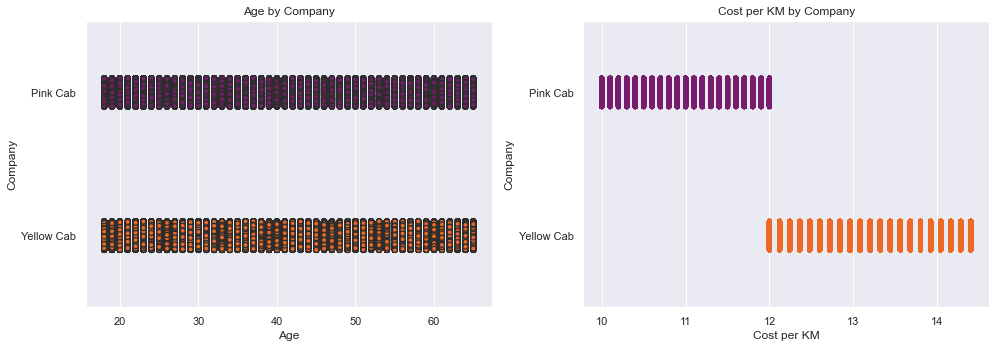

In [28]:
fig, axes = plt.subplots(1,2)

# 4.8.3 stripplot for  Age vs Company
age = sns.stripplot(data['Age'], data['Company'], palette = palette3, orient='h', linewidth=1.2, ax=axes[0])
age.set_title('Age by Company')
age.set_xlabel('Age')
age.set_ylabel('Company')

# 4.8.4 stripplot for  Cost per KM vs Company
cost_per_km = sns.stripplot(data['Cost per KM'], data['Company'], palette = palette3, orient='h', ax=axes[1])
cost_per_km.set_title('Cost per KM by Company')
cost_per_km.set_xlabel('Cost per KM')
cost_per_km.set_ylabel('Company')

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

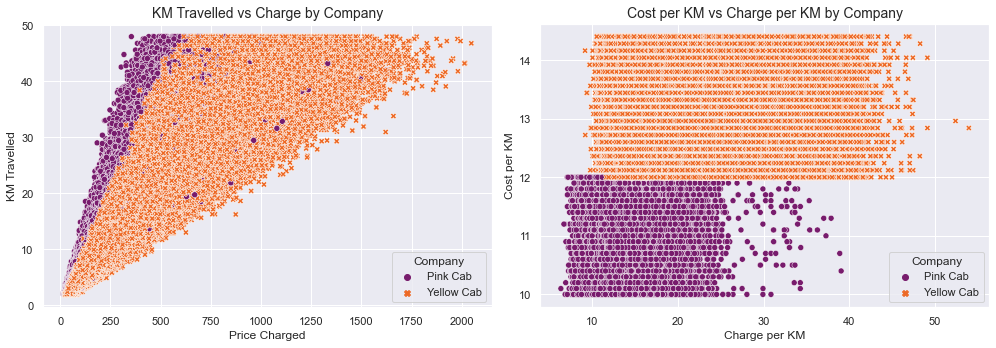

In [29]:
#Trends and Relationships
fig, axes = plt.subplots(1,2)

# 4.8.5 scatterplot => KM Travlled vs Charge
km_price=sns.scatterplot(y="KM Travelled", x='Price Charged', hue="Company", style='Company', palette = palette3, data=data,ax=axes[0])
km_price.set_title("KM Travelled vs Charge by Company", fontsize=14)

# 4.8.6 Cost per KM vs Charge per KM
cost_charge=sns.scatterplot(y="Cost per KM", x='Charge per KM', hue="Company", style='Company', palette = palette3, data=data,ax=axes[1])
cost_charge.set_title("Cost per KM vs Charge per KM by Company", fontsize=14)

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

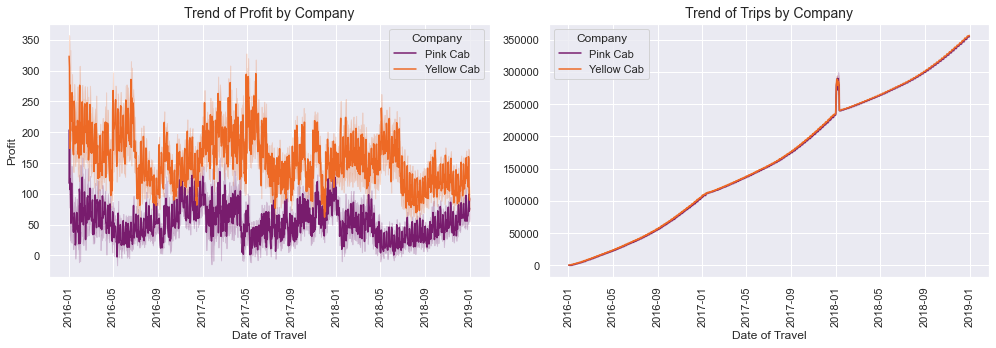

In [30]:
fig, axes = plt.subplots(1,2)

# 4.8.7 lineplot => Trend of Profit
profit_trend=sns.lineplot(y="Profit", x='Date of Travel', hue="Company", data=data,palette = palette3,ax=axes[0])
profit_trend.set_title("Trend of Profit by Company", fontsize=14)
profit_trend.tick_params(axis='x', rotation=90)

# 4.8.8 Trend of Trips
trips=sns.lineplot(y=np.arange(len(data['Company'])), x='Date of Travel', hue="Company", data=data, palette = palette3,ax=axes[1])
trips.set_title("Trend of Trips by Company", fontsize=14)
trips.tick_params(axis='x', rotation=90)

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

In [31]:
yearly_profits = data.groupby(['Year','Company']).agg({'Profit':'mean'}).reset_index()

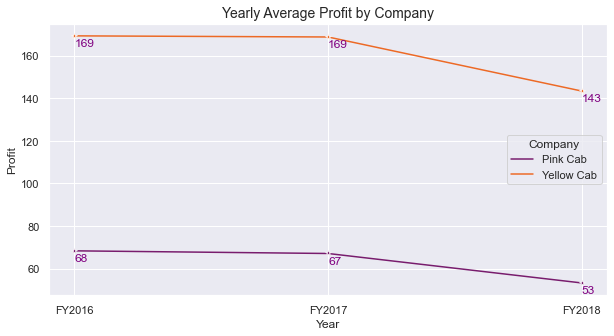

In [32]:
sns.set(rc={'figure.figsize':(10,5)})

# 4.8.9 Yearly Average Profit
ax0 = sns.lineplot(x='Year', y='Profit', data=yearly_profits, marker='*', hue="Company", palette = palette3)
ax0.set_title("Yearly Average Profit by Company", fontsize=14)

# label points on the plot
for x, y in zip(yearly_profits['Year'], yearly_profits['Profit']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y-5, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
     color = 'purple') # set colour of line


In [33]:
quarterly_profits = data.groupby(['Quarter','Company']).agg({'Profit':'mean'}).reset_index()

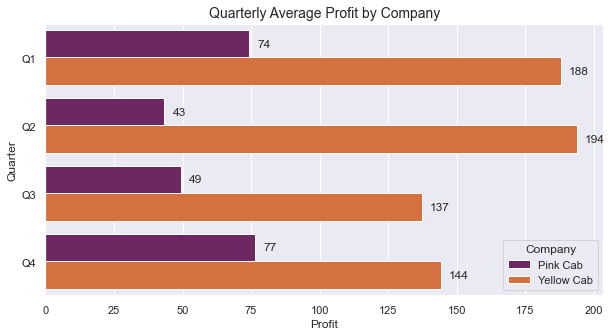

In [34]:
# 4.8.10 Quarterly Average Profit
ax1 = sns.barplot(y='Quarter', x='Profit', data=quarterly_profits, hue="Company", palette = palette3, orient='h')
ax1.set_title("Quarterly Average Profit by Company", fontsize=14)
        
# label each bar in barplot
for p in ax1.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax1.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center

In [35]:
monthly_profits = data.groupby(['Month','Company']).agg({'Profit':'mean'}).reset_index()

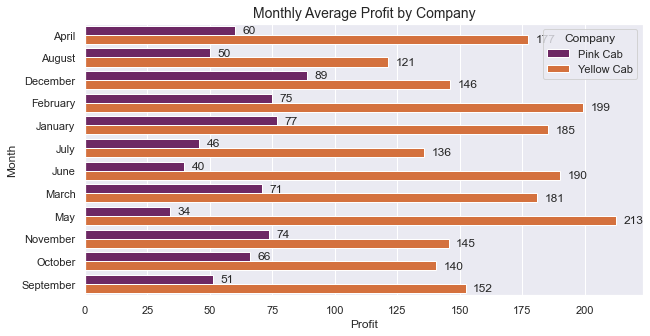

In [36]:
# 4.8.11 Monthly Average Profit
ax2 = sns.barplot(y='Month', x='Profit', data=monthly_profits, hue="Company", palette = palette3, orient='h')
ax2.set_title("Monthly Average Profit by Company", fontsize=14)
        
# label each bar in barplot
for p in ax2.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax2.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center

In [37]:
daily_profits = data.groupby(['Day','Company']).agg({'Profit':'mean'}).reset_index()

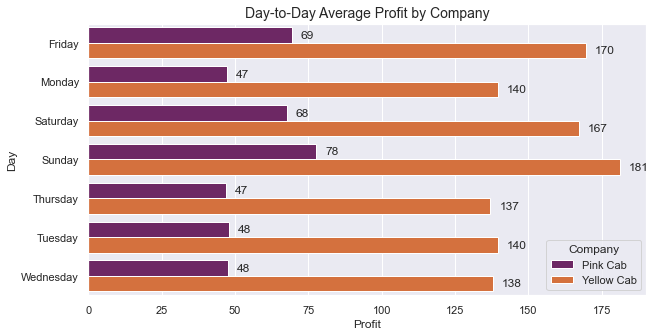

In [38]:
# 4.8.12 Day-to-Day Average Profit
ax3 = sns.barplot(y='Day', x='Profit', data=daily_profits, hue="Company", palette = palette3, orient='h')
ax3.set_title("Day-to-Day Average Profit by Company", fontsize=14)
        
# label each bar in barplot
for p in ax3.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax3.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center

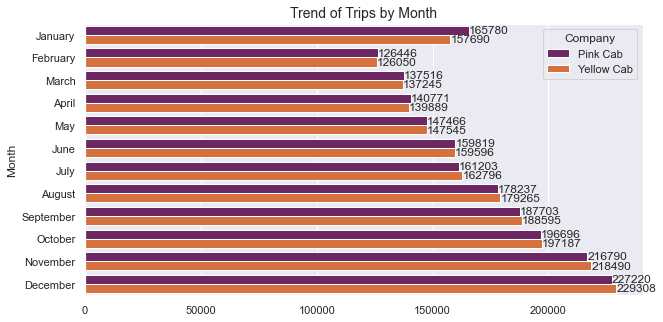

In [39]:
# 4.8.13 Monthly Trend of Trips by Company
mtrips=sns.barplot(x=np.arange(len(data['Company'])), y='Month', hue="Company", data=data,orient='h', palette = palette3,ci=None)
mtrips.set_title("Trend of Trips by Month", fontsize=14)

# label each bar in barplot
for p in mtrips.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    mtrips.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center



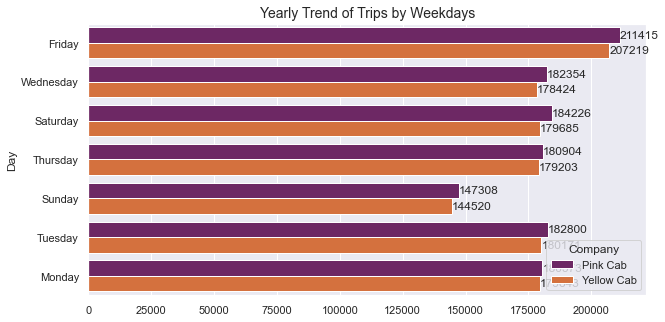

In [40]:
# 4.8.14 Day-to-Day Trend of Trips by Company
dtrips=sns.barplot(x=np.arange(len(data['Company'])), y='Day', hue="Company", data=data,orient='h', palette = palette3, ci=None)
dtrips.set_title("Yearly Trend of Trips by Weekdays", fontsize=14)

# label each bar in barplot
for p in dtrips.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    dtrips.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center
